In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import scipy as sci

In [2]:
for_fire= pd.read_csv("C:\\Users\\sathya\\Documents\\assignments\\forestfires.csv")

In [3]:
for_fire.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [5]:
for_fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
for_fire.size

16027

In [7]:
for_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
for_fire.shape

(517, 31)

In [9]:
for_fire= for_fire.drop(['month','day'],axis=1)

In [11]:
for_fire['size_category']= for_fire['size_category'].map({'small':0,'large':1})

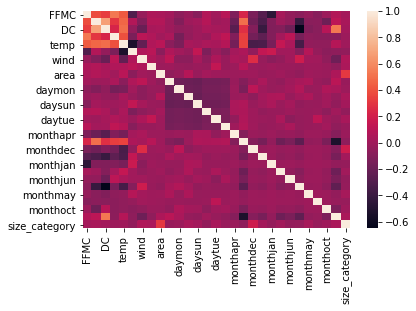

In [13]:
import seaborn as sns
sns.heatmap(for_fire.corr())

# the dataset contains negative correlation also, we need to take only the positive correlation  of above 0 

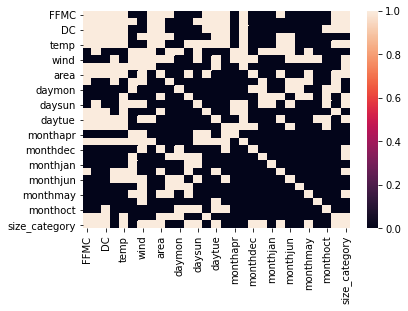

In [14]:
sns.heatmap(for_fire.corr()>0.0)

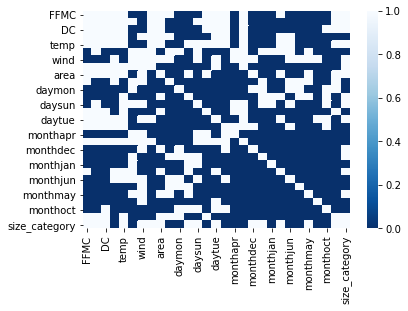

In [19]:
sns.heatmap(for_fire.corr()>0.0,cmap='Blues_r')

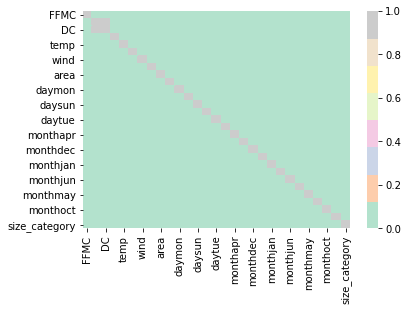

In [22]:
sns.heatmap(for_fire.corr()>0.6,cmap='Pastel2')

In [24]:
for_fire.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

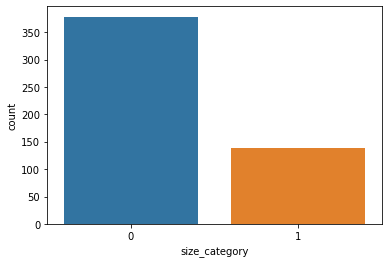

In [26]:
sns.countplot(for_fire['size_category'])

In [27]:
#splitting the dataset
x=for_fire.drop(['size_category'],axis=1)
y=for_fire['size_category']

In [28]:
# Transformation MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
x=scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y, test_size=0.2, random_state=10 )


In [32]:
((x_train.shape, y_train.shape),(x_test.shape, y_test.shape))

(((413, 28), (413,)), ((104, 28), (104,)))

In [34]:
from sklearn.datasets import make_classification
x, y = make_classification(n_features =2, n_redundant =0, n_informative=2, random_state=3)


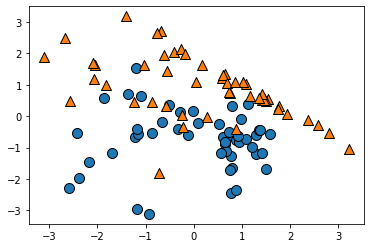

In [36]:

import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1], s=100, edgecolors='k')
plt.scatter(x[y==1][:,0], x[y==1][:,1], s=100, edgecolors='k', marker='^')
plt.show()

In [37]:
# MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification


In [38]:
from sklearn.neural_network import MLPClassifier
x, y = make_classification(n_features =2, n_redundant=0, n_informative=2, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
print("accuracy:", mlp.score(x_test, y_test))

accuracy: 0.68


In [39]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50))

In [40]:
from sklearn.neural_network import MLPClassifier

#increasing the hidden layers gives more accuracy
clf = MLPClassifier(activation ='relu',solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(3), random_state=1)
clf.fit(X,y)

pred_values = clf.predict(X)
print(pred_values)



[0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1]


In [41]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix = confusion_matrix(y,pred_values)
confusion_matrix



array([[45,  5],
       [ 8, 42]], dtype=int64)

In [42]:



classification_report = classification_report(y,pred_values)
print(classification_report)



              precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [43]:
print("Accuracy:",metrics.accuracy_score(y,pred_values))

Accuracy: 0.87


In [44]:
#the model producing 87% accuracy on the dataset